<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [10]:
%pip install seaborn
%pip install matplotlib

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [81]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [82]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [83]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [84]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [85]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [86]:
mid_v = df['ConvertedComp'].median()
df['ConvertedComp']=df['ConvertedComp'].replace(np.nan, mid_v)

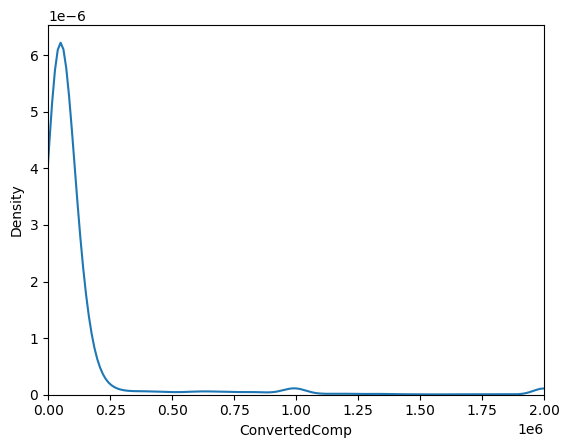

In [87]:
# your code goes here
salary = df['ConvertedComp']
sns.kdeplot(salary, fill=False)
plt.xlim(0, 2000000)
plt.show()

Plot the histogram for the column `ConvertedComp`.


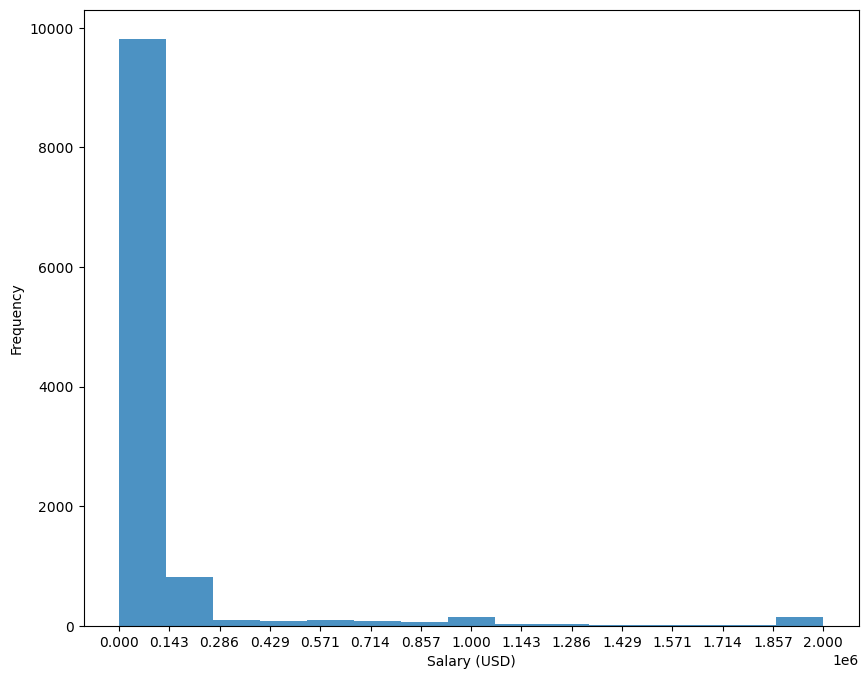

In [88]:
# your code goes here
salary = df['ConvertedComp']
bin_edges = np.linspace(salary.min(), salary.max(), 15)
salary.plot(kind='hist', figsize=(10,8), alpha=0.8, bins=15, xticks=bin_edges)
plt.xlabel('Salary (USD)')
plt.show()

What is the median of the column `ConvertedComp`?


In [89]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [90]:
# your code goes here
df[df['Gender'] == 'Man']['Gender'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [91]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57745.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [92]:
# your code goes here
age_c = df['Age']
min_a, q1, median, q3, max_a = age_c.min(), age_c.quantile(0.25), age_c.median(), age_c.quantile(0.75), age_c.max()
print("Min value is: {}, \nLower Quartile: {}, \nMedian value is: {}, \nUpper quartile is: {}, \nMax Value is: {}".format(min_a, q1, median, q3, max_a))

Min value is: 16.0, 
Lower Quartile: 25.0, 
Median value is: 29.0, 
Upper quartile is: 35.0, 
Max Value is: 99.0


Plot a histogram of the column `Age`.


In [93]:
age_c.replace(np.nan, median, inplace=True)

<AxesSubplot:ylabel='Frequency'>

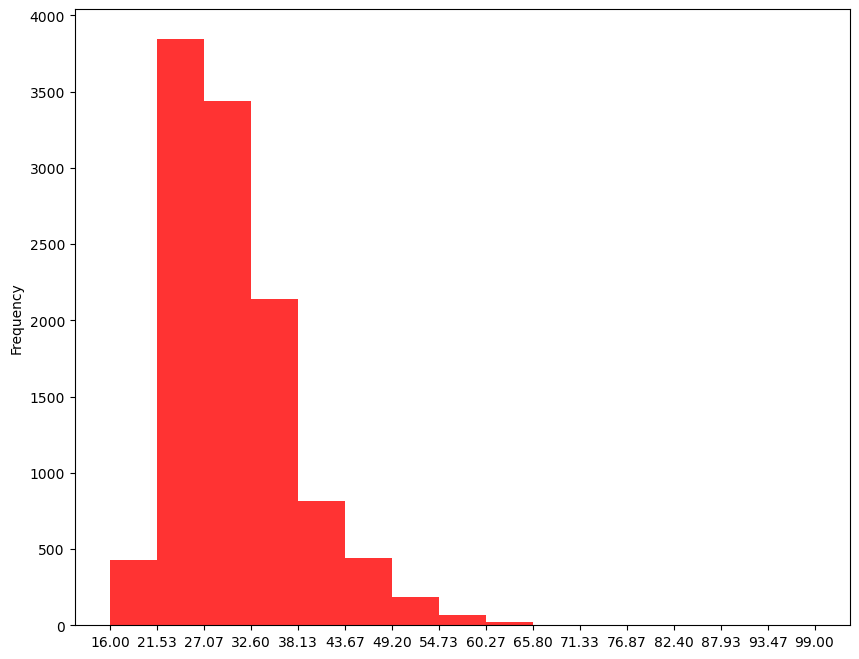

In [94]:
# your code goes here
count, bin_edges = np.histogram(age_c, 15)
age_c.plot(kind='hist', figsize=(10,8), alpha=0.8, color='r', bins=15, xticks=bin_edges)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

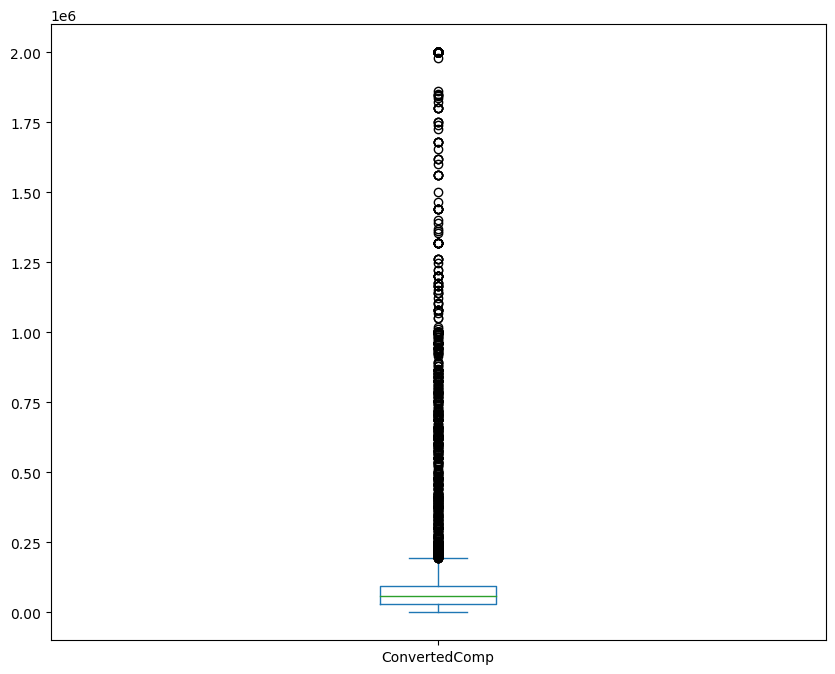

In [95]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,8))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [96]:
# your code goes here
salary = df['ConvertedComp']
Q1, Q3 = salary.quantile(0.25), salary.quantile(0.75)
IQR = Q3 - Q1
print("The IQR is: ",IQR)

The IQR is:  65984.0


Find out the upper and lower bounds.


In [97]:
# your code goes here
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print("Upper and Lower bound: ",upper_bound, lower_bound)

Upper and Lower bound:  193976.0 -69960.0


Identify how many outliers are there in the `ConvertedComp` column.


In [98]:
# your code goes here
outliers = salary.apply(lambda sal: sal if sal > upper_bound else None)
print("Number of outliers for column 'ConvertedComp' is:", outliers.dropna().count())

Number of outliers for column 'ConvertedComp' is: 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [108]:
# your code goes here
df2=df[df['ConvertedComp'] <= upper_bound]
df2.shape

(10465, 85)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [109]:
# your code goes here
numerical_col = df.select_dtypes(include=['number'])
corr_m = numerical_col.corr()
corr_m[['Age']]

,Age
Respondent,0.004282
CompTotal,0.007190
ConvertedComp,0.101777
WorkWeekHrs,0.036897
CodeRevHrs,-0.021086
Age,1.000000


<AxesSubplot:ylabel='Frequency'>

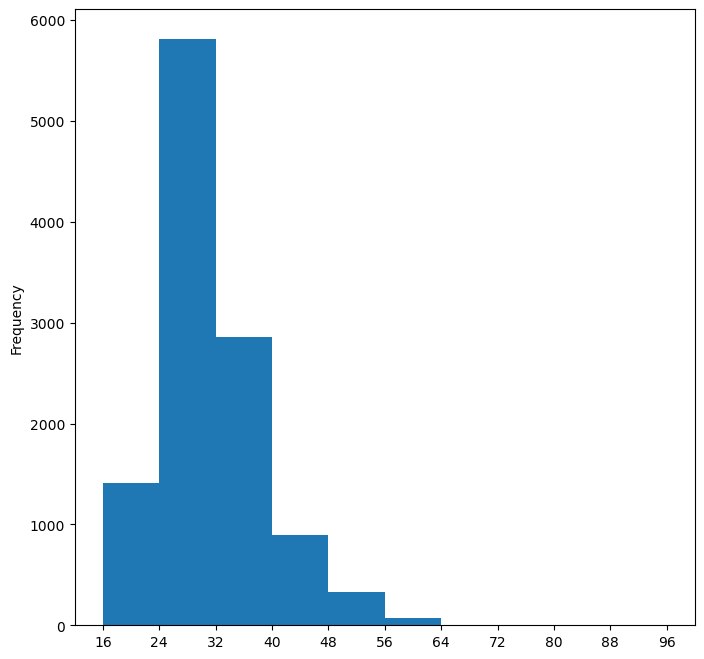

In [110]:
df['Age'].median()
bin_edges = np.arange(16, 100, 8)
df['Age'].plot(kind='hist', figsize=(8,8), bins=bin_edges, xticks=bin_edges)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
